In [1]:
from collections import Counter
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Don't bother optimizing date parsing, without parse_dates it takes 33.5 sec instead of 35.5

df = pd.read_csv(
    '../../data/dataset_utf.csv',
    parse_dates=['date']
)
df

date  RF.21304.Ток...213MII904A  \
0       2017-01-01 00:00:10                        NaN   
1       2017-01-01 00:00:20                        NaN   
2       2017-01-01 00:00:30                        NaN   
3       2017-01-01 00:00:40                        NaN   
4       2017-01-01 00:00:50                        NaN   
5       2017-01-01 00:01:00                        NaN   
6       2017-01-01 00:01:10                        NaN   
7       2017-01-01 00:01:20                        NaN   
8       2017-01-01 00:01:30                        NaN   
9       2017-01-01 00:01:40                        NaN   
10      2017-01-01 00:01:50                        NaN   
11      2017-01-01 00:02:00                        NaN   
12      2017-01-01 00:02:10                        NaN   
13      2017-01-01 00:02:20                        NaN   
14      2017-01-01 00:02:30                        NaN   
15      2017-01-01 00:02:40                        NaN   
16      2017-01-01 00:02:50                        NaN   
17      2017-01-01 00:03:00                        NaN   
18      2017-01-01 00:03:10                        NaN   
19      2017-01-01 00:03:20                        NaN   
20      2017-01-01 00:03:30                        NaN   
21      2017-01-01 00:03:40                        NaN   
22      2017-01-01 00:03:50                        NaN   
23      2017-01-01 00:04:00                        NaN   
24      2017-01-01 00:04:10                        NaN   
25      2017-01-01 00:04:20                        NaN   
26      2017-01-01 00:04:30                        NaN   
27      2017-01-01 00:04:40                        NaN   
28      2017-01-01 00:04:50                        NaN   
29      2017-01-01 00:05:00                        NaN   
...                     ...                        ...   
4068149 2018-03-30 23:55:00                        5.0   
4068150 2018-03-30 23:55:10                        4.9   
4068151 2018-03-30 23:55:20                        5.0   
4068152 2018-03-30 23:55:30                        4.9   
4068153 2018-03-30 23:55:40                        4.9   
4068154 2018-03-30 23:55:50                        5.0   
4068155 2018-03-30 23:56:00                        5.0   
4068156 2018-03-30 23:56:10                        5.1   
4068157 2018-03-30 23:56:20                        4.9   
4068158 2018-03-30 23:56:30                        4.9   
4068159 2018-03-30 23:56:40                        4.9   
4068160 2018-03-30 23:56:50                        5.0   
4068161 2018-03-30 23:57:00                        4.9   
4068162 2018-03-30 23:57:10                        5.0   
4068163 2018-03-30 23:57:20                        4.9   
4068164 2018-03-30 23:57:30                        4.9   
4068165 2018-03-30 23:57:40                        4.9   
4068166 2018-03-30 23:57:50                        4.9   
4068167 2018-03-30 23:58:00                        5.0   
4068168 2018-03-30 23:58:10                        5.0   
4068169 2018-03-30 23:58:20                        4.9   
4068170 2018-03-30 23:58:30                        5.0   
4068171 2018-03-30 23:58:40                        5.0   
4068172 2018-03-30 23:58:50                        4.9   
4068173 2018-03-30 23:59:00                        5.0   
4068174 2018-03-30 23:59:10                        4.9   
4068175 2018-03-30 23:59:20                        5.0   
4068176 2018-03-30 23:59:30                        4.9   
4068177 2018-03-30 23:59:40                        5.0   
4068178 2018-03-30 23:59:50                        4.9   

         S.C.ВПУСК.ПП.ДАВЛ...214PI226AA  S.C.ВПУСК.ПП.ДАВЛ...214PI226AB  \
0                             14.880000                       14.860000   
1                             14.880000                       14.839999   
2                             14.870000                       14.820000   
3                             14.889999                       14.870000   
4                             14.880000            

In [3]:
df.dtypes

date                                       datetime64[ns]
RF.21304.Ток...213MII904A                         float64
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA                    float64
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB                    float64
S.C.ВПУСК.ПП.ТЕМП...214TI232A                     float64
SPEED.CONTROLLER...250MSIC001.PV                  float64
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV           float64
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A                    float64
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981                float64
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A              float64
ЕХ21401.АЕ01.MFR...214AI200A                      float64
НАГНЕТАНИЕ.В.EX.21401...250PI001                  float64
ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A               float64
ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A                       float64
РАСХОД.В....EX.21401...250FIC001.PV               float64
РАСХОД.ЛИНИИ.P.W...214FI205A                      float64
СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV             float64
СПЕЦ.ЭНЕРГИЯ..

In [4]:
len(df), len(df.columns)

(4068179, 44)

In [5]:
df.columns

Index(['date', 'RF.21304.Ток...213MII904A', 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AA',
       'S.C.ВПУСК.ПП.ДАВЛ...214PI226AB', 'S.C.ВПУСК.ПП.ТЕМП...214TI232A',
       'SPEED.CONTROLLER...250MSIC001.PV',
       'XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV',
       'ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A', 'ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981',
       'Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A', 'ЕХ21401.АЕ01.MFR...214AI200A',
       'НАГНЕТАНИЕ.В.EX.21401...250PI001',
       'ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A', 'ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A',
       'РАСХОД.В....EX.21401...250FIC001.PV', 'РАСХОД.ЛИНИИ.P.W...214FI205A',
       'СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV', 'СПЕЦ.ЭНЕРГИЯ...214JYY200A',
       'ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A',
       'ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A', 'ТЕМП.ФИЛЬЕРЫ...214TI235A',
       'ТЕМП.ЩЕЛ.ДИСК.УПР...214TIC214A', 'ТЕМПЕРАТУРА.EX.21401...250TI004',
       'ТЕМПЕРАТУРА.ОБОРОТН.ВОДЫ...250TIC003.PV',
       'ТОК.ДВИГ.ГРАНУЛЯТ...214II217A', 'УПРАВЛЕНИЕ..P.25001A...250HIC001A',
  

In [6]:
df.isnull().sum(axis=0)

date                                            0
RF.21304.Ток...213MII904A                   77760
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA             151199
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB             151199
S.C.ВПУСК.ПП.ТЕМП...214TI232A              151199
SPEED.CONTROLLER...250MSIC001.PV           155519
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV     77760
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A             151199
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981          77760
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A       151199
ЕХ21401.АЕ01.MFR...214AI200A                77760
НАГНЕТАНИЕ.В.EX.21401...250PI001            77760
ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A        151199
ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A                155519
РАСХОД.В....EX.21401...250FIC001.PV         77760
РАСХОД.ЛИНИИ.P.W...214FI205A               151199
СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV       77760
СПЕЦ.ЭНЕРГИЯ...214JYY200A                   77760
ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A           77760
ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A         151199


In [7]:
df.columns

Index(['date', 'RF.21304.Ток...213MII904A', 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AA',
       'S.C.ВПУСК.ПП.ДАВЛ...214PI226AB', 'S.C.ВПУСК.ПП.ТЕМП...214TI232A',
       'SPEED.CONTROLLER...250MSIC001.PV',
       'XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV',
       'ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A', 'ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981',
       'Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A', 'ЕХ21401.АЕ01.MFR...214AI200A',
       'НАГНЕТАНИЕ.В.EX.21401...250PI001',
       'ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A', 'ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A',
       'РАСХОД.В....EX.21401...250FIC001.PV', 'РАСХОД.ЛИНИИ.P.W...214FI205A',
       'СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV', 'СПЕЦ.ЭНЕРГИЯ...214JYY200A',
       'ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A',
       'ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A', 'ТЕМП.ФИЛЬЕРЫ...214TI235A',
       'ТЕМП.ЩЕЛ.ДИСК.УПР...214TIC214A', 'ТЕМПЕРАТУРА.EX.21401...250TI004',
       'ТЕМПЕРАТУРА.ОБОРОТН.ВОДЫ...250TIC003.PV',
       'ТОК.ДВИГ.ГРАНУЛЯТ...214II217A', 'УПРАВЛЕНИЕ..P.25001A...250HIC001A',
  

In [8]:
Counter(df.isnull().sum(axis=1))

Counter({0: 3833639, 1: 1261, 5: 4320, 19: 1, 20: 77759, 23: 151199})

In [9]:
bad_dates = df['date'][df.isnull().any(axis=1)]
bad_dates

0         2017-01-01 00:00:10
1         2017-01-01 00:00:20
2         2017-01-01 00:00:30
3         2017-01-01 00:00:40
4         2017-01-01 00:00:50
5         2017-01-01 00:01:00
6         2017-01-01 00:01:10
7         2017-01-01 00:01:20
8         2017-01-01 00:01:30
9         2017-01-01 00:01:40
10        2017-01-01 00:01:50
11        2017-01-01 00:02:00
12        2017-01-01 00:02:10
13        2017-01-01 00:02:20
14        2017-01-01 00:02:30
15        2017-01-01 00:02:40
16        2017-01-01 00:02:50
17        2017-01-01 00:03:00
18        2017-01-01 00:03:10
19        2017-01-01 00:03:20
20        2017-01-01 00:03:30
21        2017-01-01 00:03:40
22        2017-01-01 00:03:50
23        2017-01-01 00:04:00
24        2017-01-01 00:04:10
25        2017-01-01 00:04:20
26        2017-01-01 00:04:30
27        2017-01-01 00:04:40
28        2017-01-01 00:04:50
29        2017-01-01 00:05:00
                  ...        
3300449   2018-01-17 23:55:00
3300450   2018-01-17 23:55:10
3300451   

In [10]:
df.date

0         2017-01-01 00:00:10
1         2017-01-01 00:00:20
2         2017-01-01 00:00:30
3         2017-01-01 00:00:40
4         2017-01-01 00:00:50
5         2017-01-01 00:01:00
6         2017-01-01 00:01:10
7         2017-01-01 00:01:20
8         2017-01-01 00:01:30
9         2017-01-01 00:01:40
10        2017-01-01 00:01:50
11        2017-01-01 00:02:00
12        2017-01-01 00:02:10
13        2017-01-01 00:02:20
14        2017-01-01 00:02:30
15        2017-01-01 00:02:40
16        2017-01-01 00:02:50
17        2017-01-01 00:03:00
18        2017-01-01 00:03:10
19        2017-01-01 00:03:20
20        2017-01-01 00:03:30
21        2017-01-01 00:03:40
22        2017-01-01 00:03:50
23        2017-01-01 00:04:00
24        2017-01-01 00:04:10
25        2017-01-01 00:04:20
26        2017-01-01 00:04:30
27        2017-01-01 00:04:40
28        2017-01-01 00:04:50
29        2017-01-01 00:05:00
                  ...        
4068149   2018-03-30 23:55:00
4068150   2018-03-30 23:55:10
4068151   

In [11]:
delta = datetime(2018, 3, 31, 0, 0, 0) - datetime(2017, 1, 1, 0, 0, 10)

In [12]:
delta.total_seconds() / 10

3922559.0

In [13]:
dates = pd.date_range(
    datetime(2017, 1, 1, 0, 0, 10),
    datetime(2018, 3, 30, 23, 59, 50),
    freq='10S'
)
dates

DatetimeIndex(['2017-01-01 00:00:10', '2017-01-01 00:00:20',
               '2017-01-01 00:00:30', '2017-01-01 00:00:40',
               '2017-01-01 00:00:50', '2017-01-01 00:01:00',
               '2017-01-01 00:01:10', '2017-01-01 00:01:20',
               '2017-01-01 00:01:30', '2017-01-01 00:01:40',
               ...
               '2018-03-30 23:58:20', '2018-03-30 23:58:30',
               '2018-03-30 23:58:40', '2018-03-30 23:58:50',
               '2018-03-30 23:59:00', '2018-03-30 23:59:10',
               '2018-03-30 23:59:20', '2018-03-30 23:59:30',
               '2018-03-30 23:59:40', '2018-03-30 23:59:50'],
              dtype='datetime64[ns]', length=3922559, freq='10S')

In [14]:
len(dates)

3922559

In [15]:
df.date.is_monotonic_increasing

False

In [16]:
sec10 = df.date[1] - df.date[0]
sec10

Timedelta('0 days 00:00:10')

In [17]:
bad = (df.date[1:].reset_index() - df.date[:-1].reset_index()).date != sec10
bad.index[bad]

Int64Index([3300478], dtype='int64')

In [18]:
df.iloc[3300470:3300490].date

3300470   2018-01-17 23:58:30
3300471   2018-01-17 23:58:40
3300472   2018-01-17 23:58:50
3300473   2018-01-17 23:59:00
3300474   2018-01-17 23:59:10
3300475   2018-01-17 23:59:20
3300476   2018-01-17 23:59:30
3300477   2018-01-17 23:59:40
3300478   2018-01-17 23:59:50
3300479   2018-01-01 03:30:00
3300480   2018-01-01 03:30:10
3300481   2018-01-01 03:30:20
3300482   2018-01-01 03:30:30
3300483   2018-01-01 03:30:40
3300484   2018-01-01 03:30:50
3300485   2018-01-01 03:31:00
3300486   2018-01-01 03:31:10
3300487   2018-01-01 03:31:20
3300488   2018-01-01 03:31:30
3300489   2018-01-01 03:31:40
Name: date, dtype: datetime64[ns]

In [19]:
df.iloc[3300478:3300480]

date  RF.21304.Ток...213MII904A  \
3300478 2018-01-17 23:59:50                        5.1   
3300479 2018-01-01 03:30:00                        5.0   

         S.C.ВПУСК.ПП.ДАВЛ...214PI226AA  S.C.ВПУСК.ПП.ДАВЛ...214PI226AB  \
3300478                             NaN                             NaN   
3300479                       12.139999                           12.58   

         S.C.ВПУСК.ПП.ТЕМП...214TI232A  SPEED.CONTROLLER...250MSIC001.PV  \
3300478                            NaN                               NaN   
3300479                     257.200012                               0.0   

         XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV  \
3300478                                34.019382   
3300479                                29.643192   

         ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A  ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981  \
3300478                             NaN                          454.300018   
3300479                          0.5518                          382.700012   

         Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A  \
3300478                                   NaN   
3300479                                  49.0   

                       ...                  ЦИЛ..3.ТЕМП.УПР...214TIC207A  \
3300478                ...                                           NaN   
3300479                ...                                         149.0   

         ЦИЛ..4.ТЕМП.УПР...214TIC208A  ЦИЛ..5.ТЕМП.УПР...214TIC209A  \
3300478                           NaN                           NaN   
3300479                         235.0                         220.0   

         ЦИЛ..6.ТЕМП.УПР...214TIC210A  ЦИЛ..7.ТЕМП.УПР...214TIC211A  \
3300478                           NaN                           NaN   
3300479                         215.0                    186.600006   

         ЦИЛ..8.ТЕМП.УПР...214TIC212A  ЦИЛ..9.ТЕМП.УПР...214TIC213A  \
3300478                           NaN                           NaN   
3300479                    185.300003                         185.0   

         ЭКСТР.ДВИГ.ВЛАСТЬ...214JI200A  ЭКСТР.ДВИГ.ПОТОК...214II200A  \
3300478                            NaN                    346.300018   
3300479                         5430.0                    329.899994   

         H2.C3..КОНТР.СООТН...212AIC008.PV  
3300478                           2.762603  
3300479                           2.665772  

[2 rows x 44 columns]

In [20]:
df.date[df.date == df.date.iloc[3300478]]

3300478   2018-01-17 23:59:50
3446098   2018-01-17 23:59:50
Name: date, dtype: datetime64[ns]

In [22]:
i0, i1, i2 = 3154859, 3300479, 3446099

df_0 = df.iloc[:i0]
df_1 = df.iloc[i0:i1]
df_2 = df.iloc[i1:i2]
df_3 = df.iloc[i2:]

In [23]:
print(df_0.date.iloc[0], df_0.date.iloc[-1])
print(df_1.date.iloc[0], df_1.date.iloc[-1])
print(df_2.date.iloc[0], df_2.date.iloc[-1])
print(df_3.date.iloc[0], df_3.date.iloc[-1])

2017-01-01 00:00:10 2018-01-01 03:29:50
2018-01-01 03:30:00 2018-01-17 23:59:50
2018-01-01 03:30:00 2018-01-17 23:59:50
2018-01-18 00:00:00 2018-03-30 23:59:50


In [24]:
for df_i in [df_0, df_1, df_2, df_3]:
    assert df_i.index.is_monotonic_increasing

In [25]:
df_0.isnull().sum(axis=0)

date                                           0
RF.21304.Ток...213MII904A                  77760
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA              5579
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB              5579
S.C.ВПУСК.ПП.ТЕМП...214TI232A               5579
SPEED.CONTROLLER...250MSIC001.PV            9899
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV    77760
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A              5579
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981         77760
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A        5579
ЕХ21401.АЕ01.MFR...214AI200A               77760
НАГНЕТАНИЕ.В.EX.21401...250PI001           77760
ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A         5579
ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A                 9899
РАСХОД.В....EX.21401...250FIC001.PV        77760
РАСХОД.ЛИНИИ.P.W...214FI205A                5579
СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV      77760
СПЕЦ.ЭНЕРГИЯ...214JYY200A                  77760
ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A          77760
ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A          5579
ТЕМП.ФИЛЬЕРЫ...214TI

In [26]:
df_1.isnull().sum(axis=0)

date                                            0
RF.21304.Ток...213MII904A                       0
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA             145620
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB             145620
S.C.ВПУСК.ПП.ТЕМП...214TI232A              145620
SPEED.CONTROLLER...250MSIC001.PV           145620
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV         0
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A             145620
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981              0
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A       145620
ЕХ21401.АЕ01.MFR...214AI200A                    0
НАГНЕТАНИЕ.В.EX.21401...250PI001                0
ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A        145620
ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A                145620
РАСХОД.В....EX.21401...250FIC001.PV             0
РАСХОД.ЛИНИИ.P.W...214FI205A               145620
СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV           0
СПЕЦ.ЭНЕРГИЯ...214JYY200A                       0
ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A               0
ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A         145620


In [27]:
df_2.isnull().sum(axis=0)

date                                       0
RF.21304.Ток...213MII904A                  0
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA             0
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB             0
S.C.ВПУСК.ПП.ТЕМП...214TI232A              0
SPEED.CONTROLLER...250MSIC001.PV           0
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV    0
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A             0
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981         0
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A       0
ЕХ21401.АЕ01.MFR...214AI200A               0
НАГНЕТАНИЕ.В.EX.21401...250PI001           0
ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A        0
ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A                0
РАСХОД.В....EX.21401...250FIC001.PV        0
РАСХОД.ЛИНИИ.P.W...214FI205A               0
СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV      0
СПЕЦ.ЭНЕРГИЯ...214JYY200A                  0
ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A          0
ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A         0
ТЕМП.ФИЛЬЕРЫ...214TI235A                   0
ТЕМП.ЩЕЛ.ДИСК.УПР...214TIC214A             0
ТЕМПЕРАТУР

In [28]:
df_3.isnull().sum().sum()

0

In [29]:
v1 = df_1.drop('date', axis=1).values
v2 = df_2.drop('date', axis=1).values

np.abs(np.where(np.isnan(v1), 0, v1 - v2)).max()

1.8189894035458565e-12

In [30]:
df_clean = df.drop(np.arange(i0, i1), axis=0).reset_index()
df_clean

index                date  RF.21304.Ток...213MII904A  \
0              0 2017-01-01 00:00:10                        NaN   
1              1 2017-01-01 00:00:20                        NaN   
2              2 2017-01-01 00:00:30                        NaN   
3              3 2017-01-01 00:00:40                        NaN   
4              4 2017-01-01 00:00:50                        NaN   
5              5 2017-01-01 00:01:00                        NaN   
6              6 2017-01-01 00:01:10                        NaN   
7              7 2017-01-01 00:01:20                        NaN   
8              8 2017-01-01 00:01:30                        NaN   
9              9 2017-01-01 00:01:40                        NaN   
10            10 2017-01-01 00:01:50                        NaN   
11            11 2017-01-01 00:02:00                        NaN   
12            12 2017-01-01 00:02:10                        NaN   
13            13 2017-01-01 00:02:20                        NaN   
14            14 2017-01-01 00:02:30                        NaN   
15            15 2017-01-01 00:02:40                        NaN   
16            16 2017-01-01 00:02:50                        NaN   
17            17 2017-01-01 00:03:00                        NaN   
18            18 2017-01-01 00:03:10                        NaN   
19            19 2017-01-01 00:03:20                        NaN   
20            20 2017-01-01 00:03:30                        NaN   
21            21 2017-01-01 00:03:40                        NaN   
22            22 2017-01-01 00:03:50                        NaN   
23            23 2017-01-01 00:04:00                        NaN   
24            24 2017-01-01 00:04:10                        NaN   
25            25 2017-01-01 00:04:20                        NaN   
26            26 2017-01-01 00:04:30                        NaN   
27            27 2017-01-01 00:04:40                        NaN   
28            28 2017-01-01 00:04:50                        NaN   
29            29 2017-01-01 00:05:00                        NaN   
...          ...                 ...                        ...   
3922529  4068149 2018-03-30 23:55:00                        5.0   
3922530  4068150 2018-03-30 23:55:10                        4.9   
3922531  4068151 2018-03-30 23:55:20                        5.0   
3922532  4068152 2018-03-30 23:55:30                        4.9   
3922533  4068153 2018-03-30 23:55:40                        4.9   
3922534  4068154 2018-03-30 23:55:50                        5.0   
3922535  4068155 2018-03-30 23:56:00                        5.0   
3922536  4068156 2018-03-30 23:56:10                        5.1   
3922537  4068157 2018-03-30 23:56:20                        4.9   
3922538  4068158 2018-03-30 23:56:30                        4.9   
3922539  4068159 2018-03-30 23:56:40                        4.9   
3922540  4068160 2018-03-30 23:56:50                        5.0   
3922541  4068161 2018-03-30 23:57:00                        4.9   
3922542  4068162 2018-03-30 23:57:10                        5.0   
3922543  4068163 2018-03-30 23:57:20                        4.9   
3922544  4068164 2018-03-30 23:57:30                        4.9   
3922545  4068165 2018-03-30 23:57:40                        4.9   
3922546  4068166 2018-03-30 23:57:50                        4.9   
3922547  4068167 2018-03-30 23:58:00                        5.0   
3922548  4068168 2018-03-30 23:58:10                        5.0   
3922549  4068169 2018-03-30 23:58:20                        4.9   
3922550  4068170 2018-03-30 23:58:30                        5.0   
3922551  4068171 2018-03-30 23:58:40                        5.0   
3922552  4068172 2018-03-30 23:58:50                        4.9   
3922553  4068173 2018-03-30 23:59:00                        5.0   
3922554  4068174 2018-03-30 23:59:10                        4.9   
3922555  4068175 2018-03-30 23:59:20                        5.0   
3922556  4068176 2018-03-30 23:59:30                      

In [31]:
df_clean.isnull().sum(axis=0)

index                                          0
date                                           0
RF.21304.Ток...213MII904A                  77760
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA              5579
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB              5579
S.C.ВПУСК.ПП.ТЕМП...214TI232A               5579
SPEED.CONTROLLER...250MSIC001.PV            9899
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV    77760
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A              5579
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981         77760
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A        5579
ЕХ21401.АЕ01.MFR...214AI200A               77760
НАГНЕТАНИЕ.В.EX.21401...250PI001           77760
ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A         5579
ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A                 9899
РАСХОД.В....EX.21401...250FIC001.PV        77760
РАСХОД.ЛИНИИ.P.W...214FI205A                5579
СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV      77760
СПЕЦ.ЭНЕРГИЯ...214JYY200A                  77760
ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A          77760
ТЕМП.ЛИН.Г.В..ЛИН.РА

In [32]:
Counter(df_clean.date[df_clean.isnull().any(axis=1)].map(lambda x: x.month + 12 * (x.year - 2017)))

Counter({1: 79019, 4: 4320, 8: 2, 10: 4319, 13: 1260})

In [33]:
start_time = df_clean.date.iloc[0]

In [34]:
Counter(df_clean.date[df_clean.isnull().any(axis=1)].map(lambda x: ((x - start_time).total_seconds() + 10) // 86400))

Counter({0.0: 8639,
         1.0: 8640,
         2.0: 8640,
         3.0: 8640,
         4.0: 8640,
         5.0: 8640,
         6.0: 8640,
         7.0: 8640,
         8.0: 8640,
         9.0: 1260,
         104.0: 4320,
         212.0: 2,
         281.0: 4319,
         365.0: 1260})

In [35]:
df_stops = pd.read_csv('../../data/stops.csv', parse_dates=['date'])
df_stops

date       type
0  2017-11-01 11:03:00       stop
1  2017-01-30 08:51:00       stop
2  2017-02-24 17:45:00       stop
3  2017-07-03 00:16:00       stop
4  2017-08-03 11:23:00  vibrosito
5  2017-08-03 15:56:00  vibrosito
6  2017-10-03 17:55:00       stop
7  2017-03-31 01:42:00  vibrosito
8  2017-01-04 07:45:00       stop
9  2017-03-04 20:48:00       stop
10 2017-04-21 10:02:00       stop
11 2017-04-24 13:51:00       stop
12 2017-04-06 13:23:00       stop
13 2017-06-06 13:32:00  vibrosito
14 2017-07-06 16:29:00  vibrosito
15 2017-06-10 03:21:00       stop
16 2017-08-10 16:00:00       stop
17 2017-10-14 14:13:00       stop
18 2017-10-15 09:34:00  vibrosito
19 2017-10-21 02:23:00       stop
20 2017-07-11 04:13:00       stop
21 2017-09-11 04:00:00       stop
22 2017-10-11 13:06:00       stop
23 2017-11-14 05:20:00       stop
24 2017-11-16 21:25:00       stop
25 2017-11-19 01:55:00  vibrosito
26 2017-11-19 11:21:00  vibrosito
27 2017-11-21 22:53:00       stop
28 2017-09-12 08:12:00  vibrosito
29 2017-09-12 21:36:00  vibrosito
..                 ...        ...
36 2017-12-12 12:12:00  vibrosito
37 2017-12-12 17:40:00  vibrosito
38 2017-12-15 00:46:00  vibrosito
39 2017-12-15 14:17:00  vibrosito
40 2017-12-15 19:58:00  vibrosito
41 2017-12-16 09:12:00  vibrosito
42 2017-12-16 22:03:00  vibrosito
43 2017-12-17 15:22:00  vibrosito
44 2017-12-18 03:50:00  vibrosito
45 2017-12-18 14:52:00  vibrosito
46 2017-12-20 08:27:00  vibrosito
47 2018-11-01 20:07:00  vibrosito
48 2018-01-15 14:19:00  vibrosito
49 2018-01-19 14:18:00  vibrosito
50 2018-01-19 23:37:00  vibrosito
51 2018-01-20 15:49:00  vibrosito
52 2018-01-21 06:24:00  vibrosito
53 2018-01-21 12:33:00  vibrosito
54 2018-01-23 06:16:00  vibrosito
55 2018-01-23 21:06:00  vibrosito
56 2018-01-26 10:13:00  vibrosito
57 2018-03-02 23:56:00  vibrosito
58 2018-04-02 16:22:00  vibrosito
59 2018-05-02 11:31:00  vibrosito
60 2018-05-02 21:30:00  vibrosito
61 2018-06-02 07:46:00  vibrosito
62 2018-02-15 02:47:00  vibrosito
63 2018-02-15 11:16:00  vibrosito
64 2018-03-03 21:45:00  vibrosito
65 2018-02-04 18:45:00  vibrosito

[66 rows x 2 columns]

In [36]:
df_clean.date.iloc[0]

Timestamp('2017-01-01 00:00:10')

In [37]:
start_2017 = pd.Timestamp(year=2017, month=1, day=11, hour=0, minute=0, second=0)
end_2017   = pd.Timestamp(year=2017, month=12, day=31, hour=23, minute=59, second=59)

In [38]:
df_2017 = df_clean[(start_2017 <= df_clean.date) & (df_clean.date <= end_2017)]
df_2017

index                date  RF.21304.Ток...213MII904A  \
86399      86399 2017-01-11 00:00:00                        5.0   
86400      86400 2017-01-11 00:00:10                        5.0   
86401      86401 2017-01-11 00:00:20                        5.0   
86402      86402 2017-01-11 00:00:30                        5.1   
86403      86403 2017-01-11 00:00:40                        5.0   
86404      86404 2017-01-11 00:00:50                        4.9   
86405      86405 2017-01-11 00:01:00                        5.1   
86406      86406 2017-01-11 00:01:10                        5.0   
86407      86407 2017-01-11 00:01:20                        5.0   
86408      86408 2017-01-11 00:01:30                        4.9   
86409      86409 2017-01-11 00:01:40                        5.0   
86410      86410 2017-01-11 00:01:50                        5.0   
86411      86411 2017-01-11 00:02:00                        5.0   
86412      86412 2017-01-11 00:02:10                        5.1   
86413      86413 2017-01-11 00:02:20                        5.1   
86414      86414 2017-01-11 00:02:30                        5.0   
86415      86415 2017-01-11 00:02:40                        5.1   
86416      86416 2017-01-11 00:02:50                        5.1   
86417      86417 2017-01-11 00:03:00                        4.9   
86418      86418 2017-01-11 00:03:10                        5.1   
86419      86419 2017-01-11 00:03:20                        5.0   
86420      86420 2017-01-11 00:03:30                        5.0   
86421      86421 2017-01-11 00:03:40                        4.9   
86422      86422 2017-01-11 00:03:50                        5.0   
86423      86423 2017-01-11 00:04:00                        5.1   
86424      86424 2017-01-11 00:04:10                        5.0   
86425      86425 2017-01-11 00:04:20                        5.0   
86426      86426 2017-01-11 00:04:30                        5.1   
86427      86427 2017-01-11 00:04:40                        5.0   
86428      86428 2017-01-11 00:04:50                        5.0   
...          ...                 ...                        ...   
3153569  3153569 2017-12-31 23:55:00                        5.0   
3153570  3153570 2017-12-31 23:55:10                        5.0   
3153571  3153571 2017-12-31 23:55:20                        4.9   
3153572  3153572 2017-12-31 23:55:30                        5.0   
3153573  3153573 2017-12-31 23:55:40                        5.0   
3153574  3153574 2017-12-31 23:55:50                        5.0   
3153575  3153575 2017-12-31 23:56:00                        4.9   
3153576  3153576 2017-12-31 23:56:10                        4.9   
3153577  3153577 2017-12-31 23:56:20                        5.0   
3153578  3153578 2017-12-31 23:56:30                        5.0   
3153579  3153579 2017-12-31 23:56:40                        5.0   
3153580  3153580 2017-12-31 23:56:50                        5.0   
3153581  3153581 2017-12-31 23:57:00                        4.9   
3153582  3153582 2017-12-31 23:57:10                        5.0   
3153583  3153583 2017-12-31 23:57:20                        5.0   
3153584  3153584 2017-12-31 23:57:30                        4.9   
3153585  3153585 2017-12-31 23:57:40                        5.0   
3153586  3153586 2017-12-31 23:57:50                        5.0   
3153587  3153587 2017-12-31 23:58:00                        5.0   
3153588  3153588 2017-12-31 23:58:10                        4.9   
3153589  3153589 2017-12-31 23:58:20                        4.8   
3153590  3153590 2017-12-31 23:58:30                        5.0   
3153591  3153591 2017-12-31 23:58:40                        4.9   
3153592  3153592 2017-12-31 23:58:50                        5.0   
3153593  3153593 2017-12-31 23:59:00                        4.9   
3153594  3153594 2017-12-31 23:59:10                        4.9   
3153595  3153595 2017-12-31 23:59:20                        4.9   
3153596  3153596 2017-12-31 23:59:30                      

In [39]:
df_2017.isnull().sum(axis=0)

index                                         0
date                                          0
RF.21304.Ток...213MII904A                     1
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA             4319
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB             4319
S.C.ВПУСК.ПП.ТЕМП...214TI232A              4319
SPEED.CONTROLLER...250MSIC001.PV           8639
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV       1
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A             4319
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981            1
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A       4319
ЕХ21401.АЕ01.MFR...214AI200A                  1
НАГНЕТАНИЕ.В.EX.21401...250PI001              1
ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A        4319
ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A                8639
РАСХОД.В....EX.21401...250FIC001.PV           1
РАСХОД.ЛИНИИ.P.W...214FI205A               4319
СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV         1
СПЕЦ.ЭНЕРГИЯ...214JYY200A                     1
ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A             1
ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A      

In [40]:
Counter(df_2017.date[df_2017.isnull().any(axis=1)].map(lambda x: ((x - start_time).total_seconds() + 10) // 86400))

Counter({104.0: 4320, 212.0: 2, 281.0: 4319})

In [41]:
start_time + pd.Timedelta(days=104)

Timestamp('2017-04-15 00:00:10')

In [42]:
start_time + pd.Timedelta(days=281)

Timestamp('2017-10-09 00:00:10')

In [43]:
start_time + pd.Timedelta(days=212)

Timestamp('2017-08-01 00:00:10')

In [44]:
df_2017.set_index(pd.DatetimeIndex(df_2017['date']))['RF.21304.Ток...213MII904A']# .resample('H')

date
2017-01-11 00:00:00    5.0
2017-01-11 00:00:10    5.0
2017-01-11 00:00:20    5.0
2017-01-11 00:00:30    5.1
2017-01-11 00:00:40    5.0
2017-01-11 00:00:50    4.9
2017-01-11 00:01:00    5.1
2017-01-11 00:01:10    5.0
2017-01-11 00:01:20    5.0
2017-01-11 00:01:30    4.9
2017-01-11 00:01:40    5.0
2017-01-11 00:01:50    5.0
2017-01-11 00:02:00    5.0
2017-01-11 00:02:10    5.1
2017-01-11 00:02:20    5.1
2017-01-11 00:02:30    5.0
2017-01-11 00:02:40    5.1
2017-01-11 00:02:50    5.1
2017-01-11 00:03:00    4.9
2017-01-11 00:03:10    5.1
2017-01-11 00:03:20    5.0
2017-01-11 00:03:30    5.0
2017-01-11 00:03:40    4.9
2017-01-11 00:03:50    5.0
2017-01-11 00:04:00    5.1
2017-01-11 00:04:10    5.0
2017-01-11 00:04:20    5.0
2017-01-11 00:04:30    5.1
2017-01-11 00:04:40    5.0
2017-01-11 00:04:50    5.0
                      ... 
2017-12-31 23:55:00    5.0
2017-12-31 23:55:10    5.0
2017-12-31 23:55:20    4.9
2017-12-31 23:55:30    5.0
2017-12-31 23:55:40    5.0
2017-12-31 23:55:50    

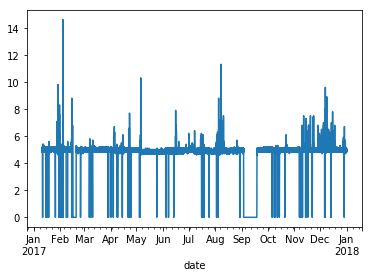

In [45]:
df_2017.set_index(pd.DatetimeIndex(df_2017['date']))['RF.21304.Ток...213MII904A'].plot()

In [2]:
### df_2017.to_hdf('../../data/cleaned_dataset_utf.h5',key='data', complevel=2)
df_2017 = pd.read_hdf('../../data/cleaned_dataset_utf.h5',key='data')

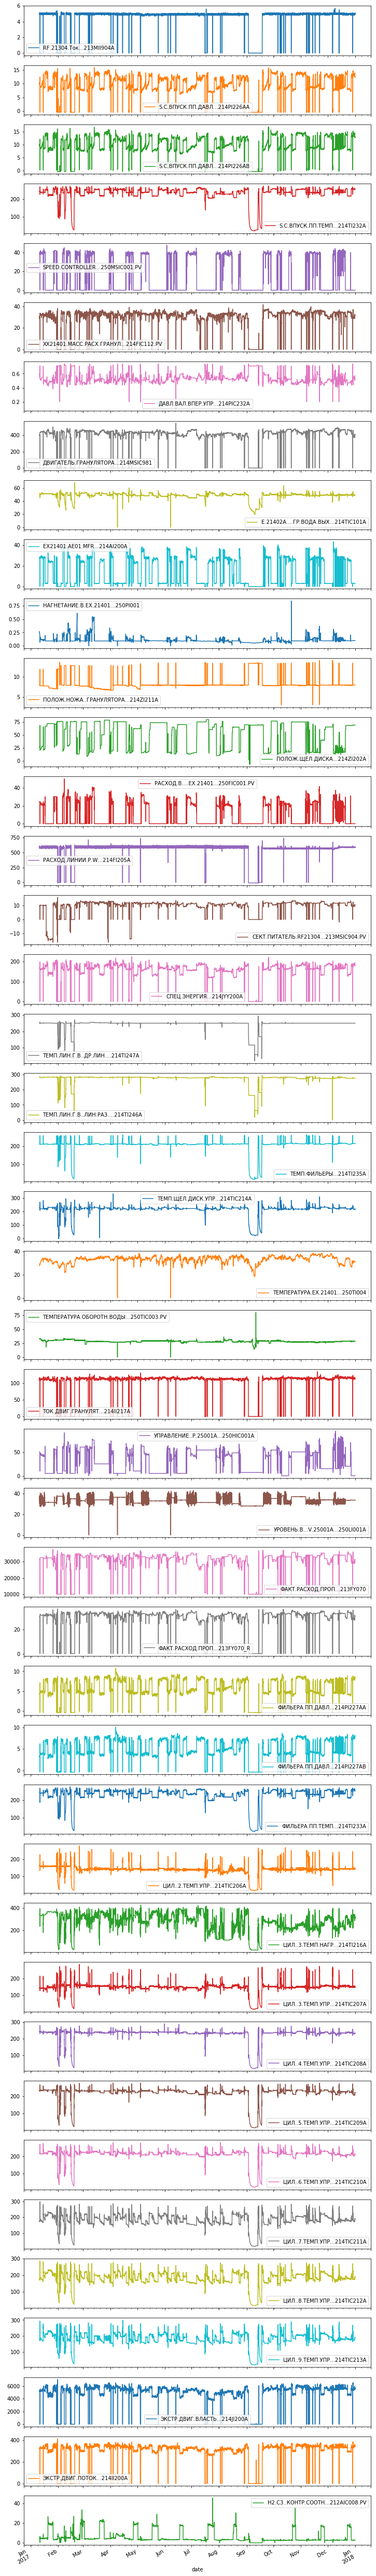

In [58]:
_ = df_2017.set_index('date').drop(columns=['index'])[::100].plot(subplots=True, figsize=(12, 100))

In [3]:
df = df_2017.set_index('date').drop(columns=['index'])

In [4]:
from tqdm import tqdm_notebook

In [20]:
rank_df  = pd.DataFrame(index = df.index)

for col in tqdm_notebook(df.columns):
    value_bins = pd.qcut(df[col],np.linspace(0,1,101), duplicates='drop')
    bin_to_freq = dict(value_bins.value_counts())
    rank_df[col] = value_bins.apply(lambda i: bin_to_freq[i])


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

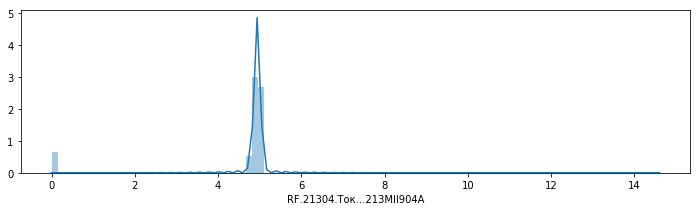

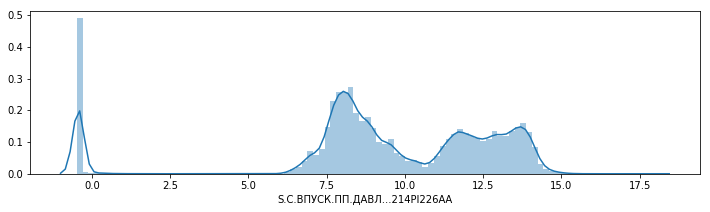

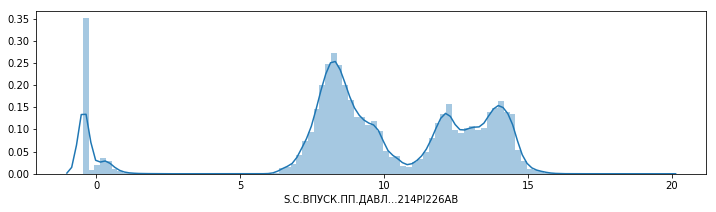

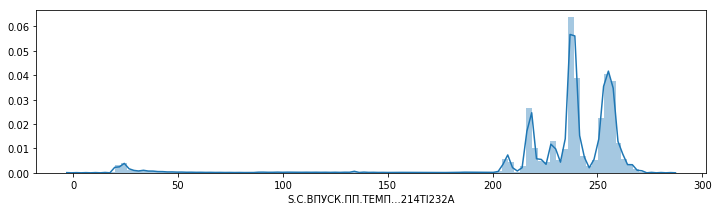

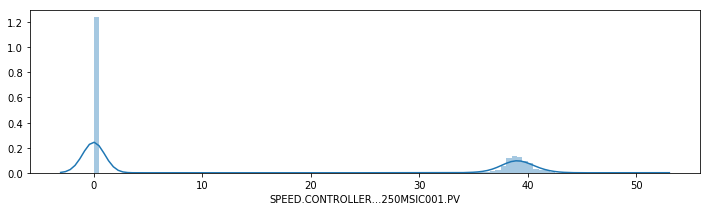

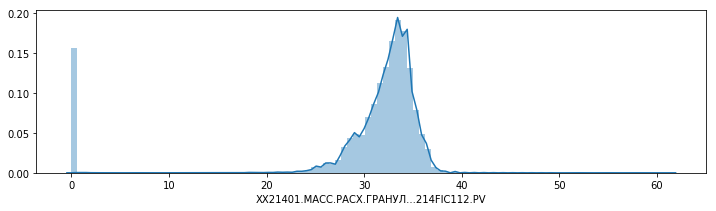

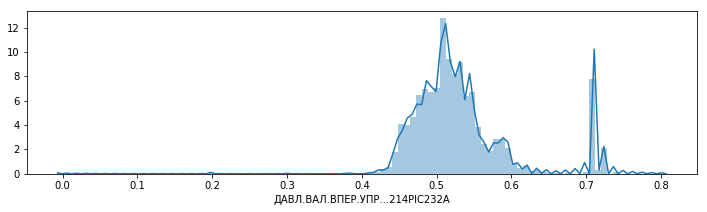

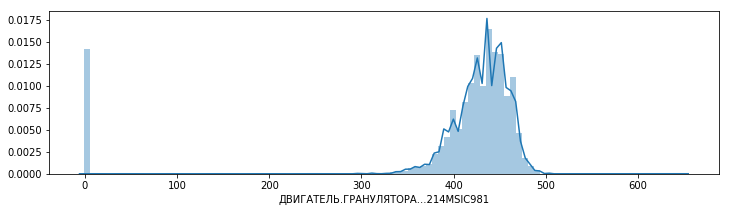

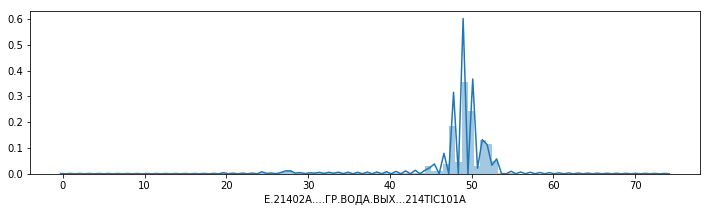

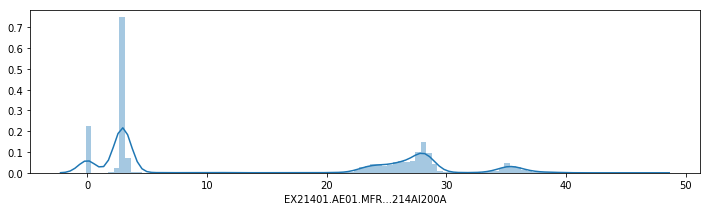

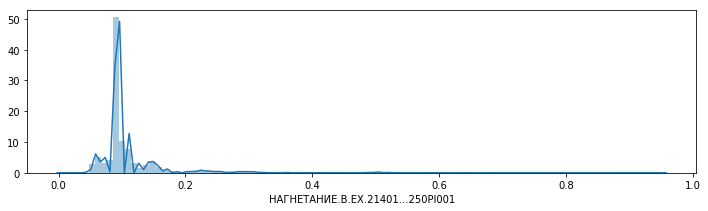

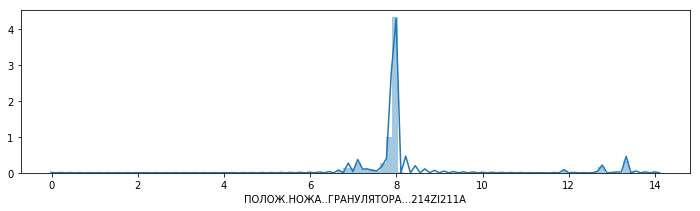

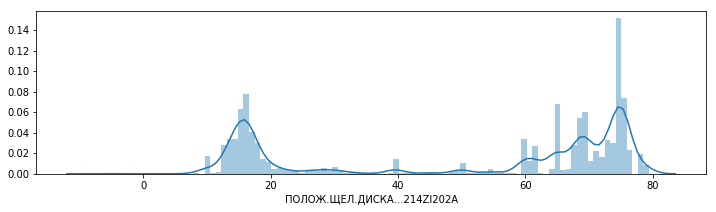

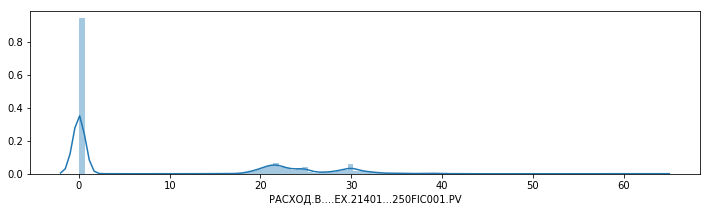

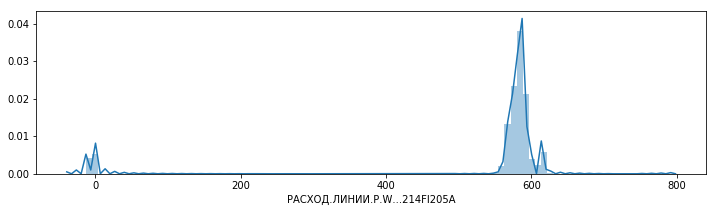

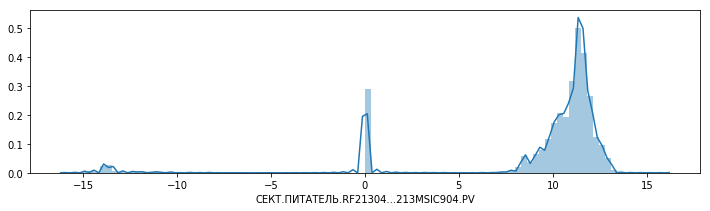

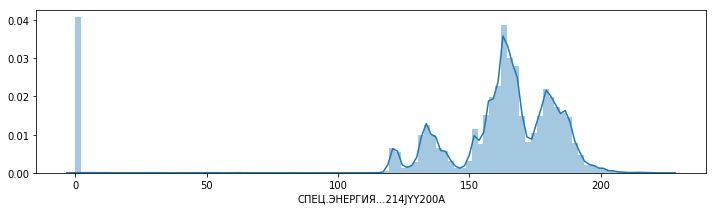

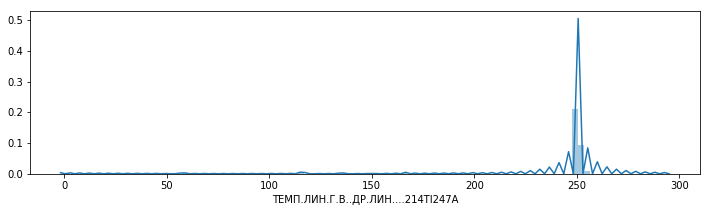

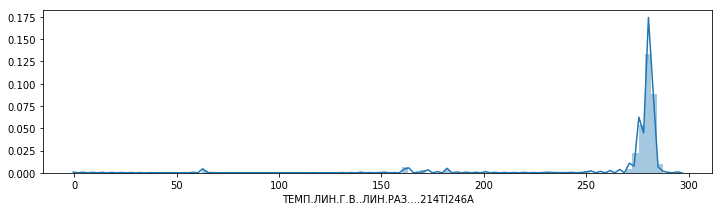

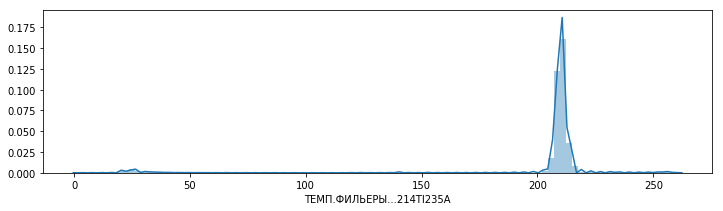

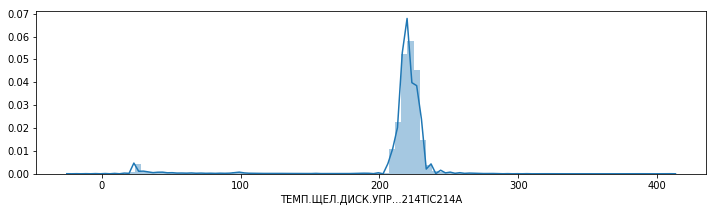

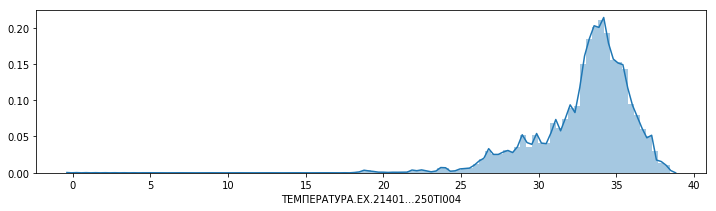

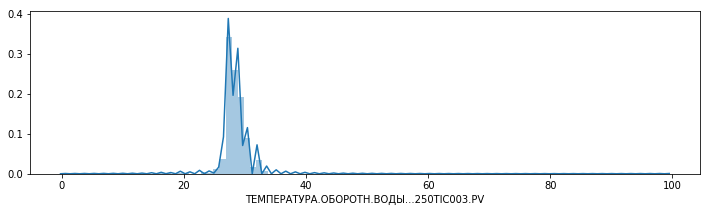

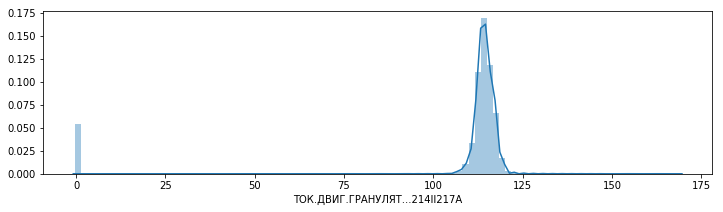

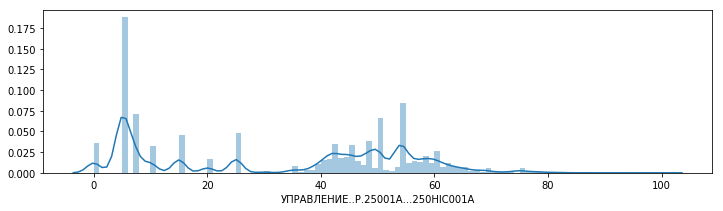

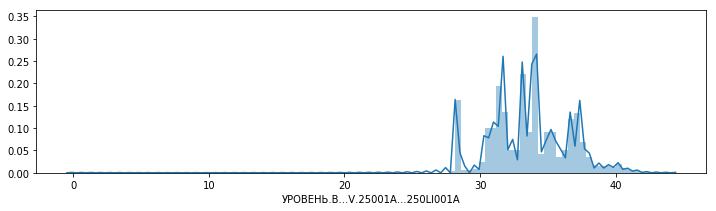

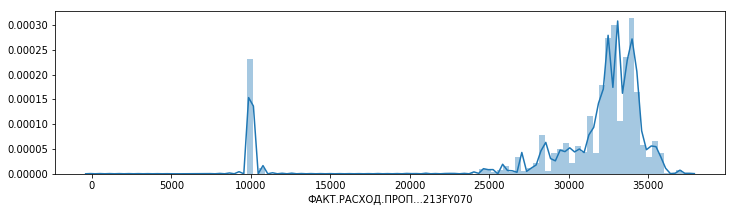

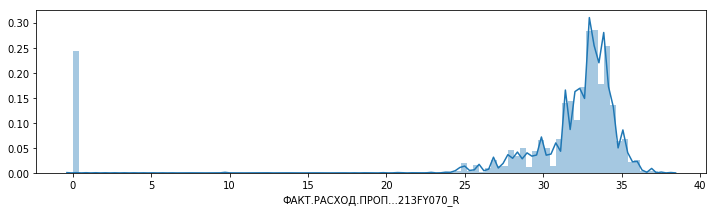

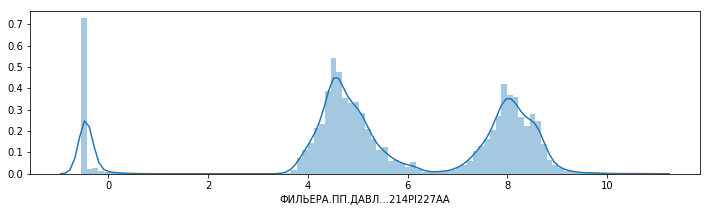

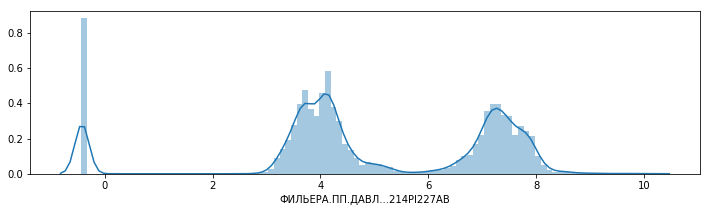

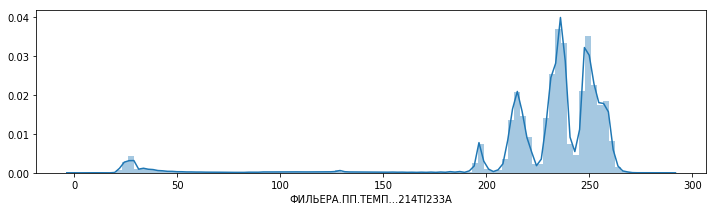

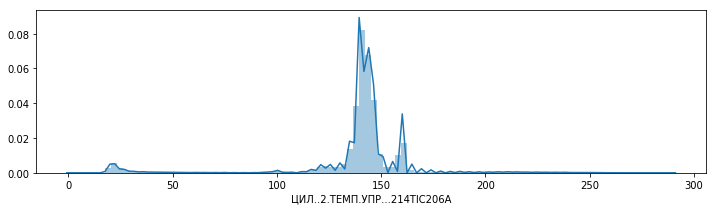

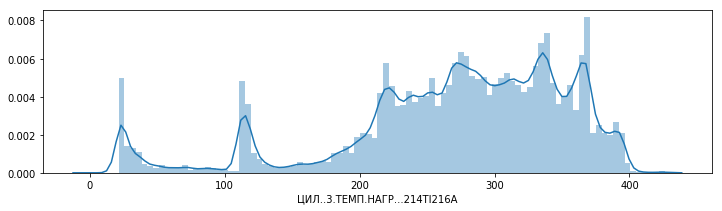

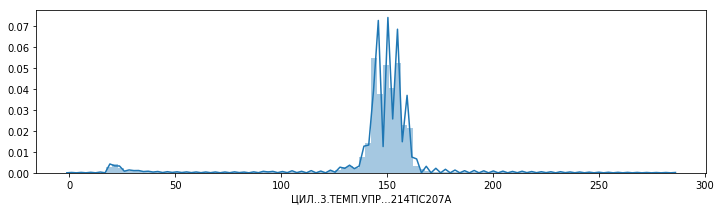

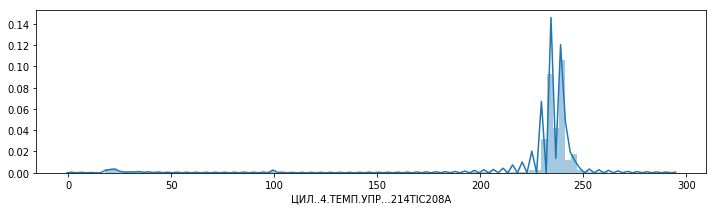

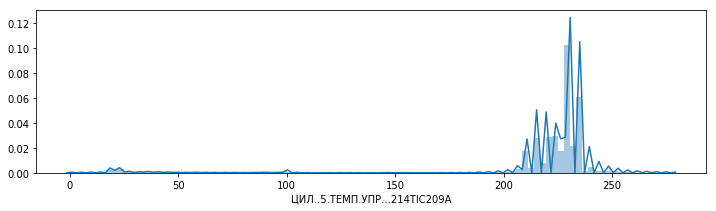

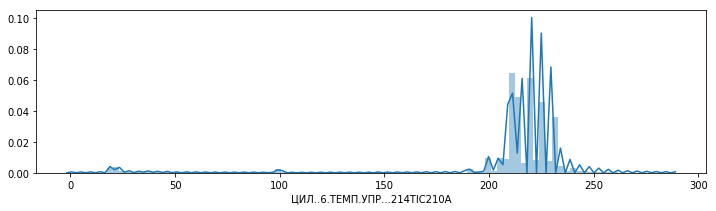

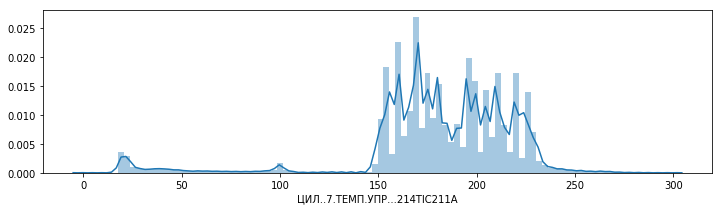

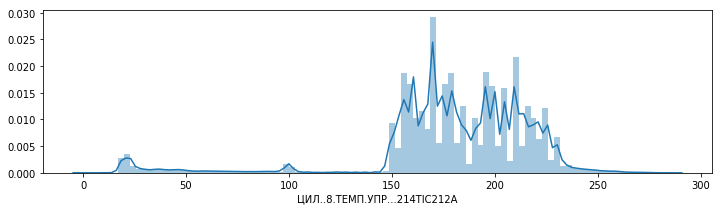

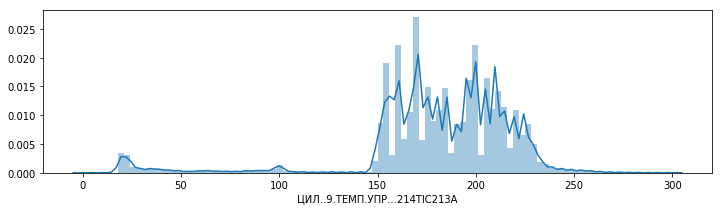

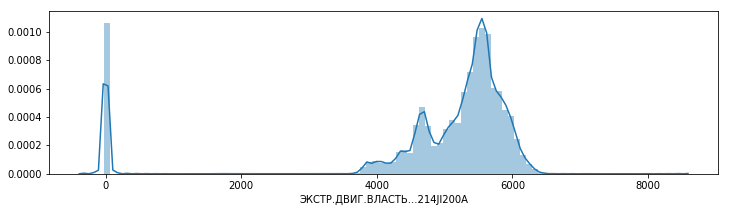

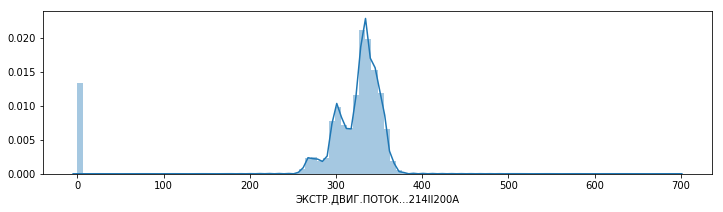

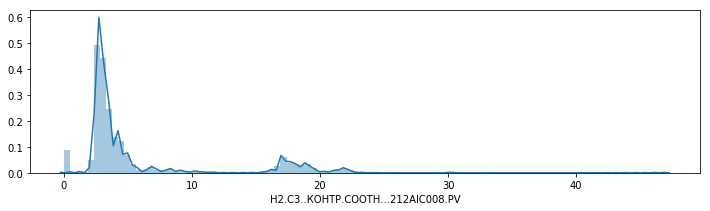

In [70]:
for col in df.columns:
    plt.figure(figsize=(12, 3))
    sns.distplot(df[col].dropna(), bins=100)

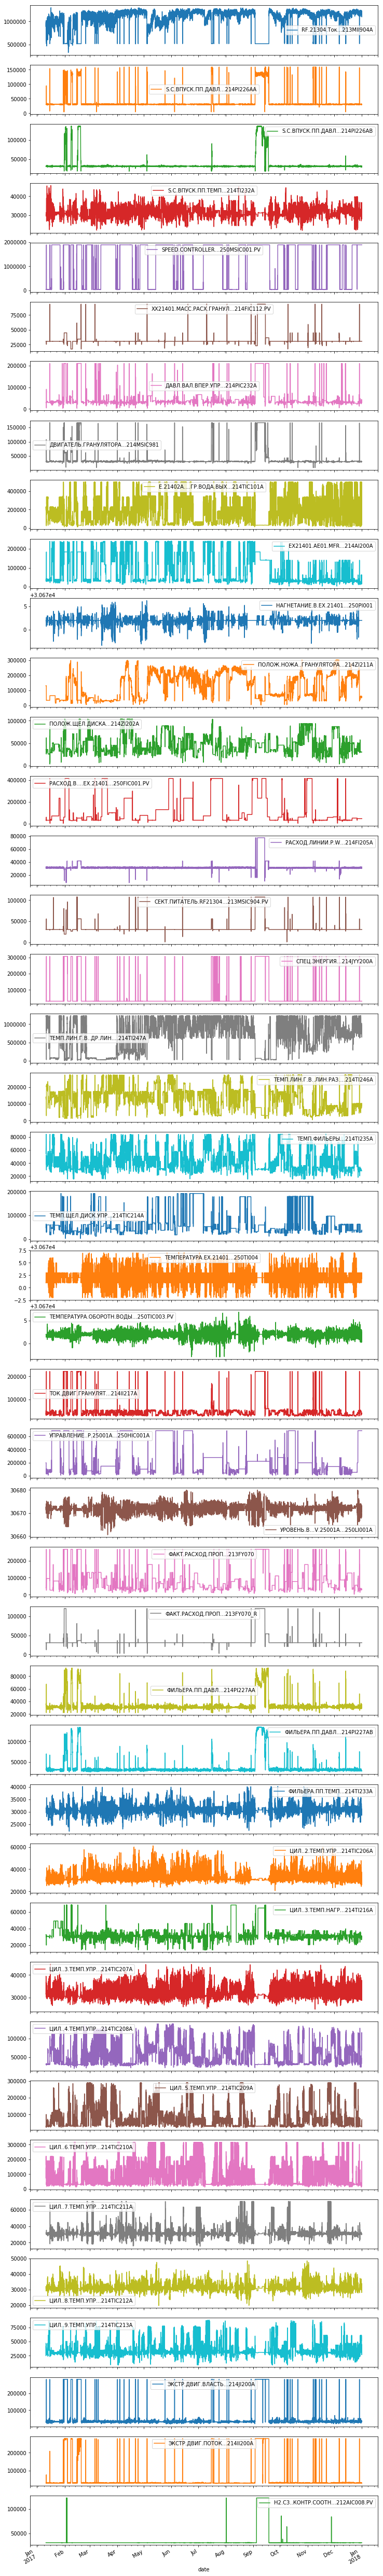

In [21]:
_= rank_df.rolling(window=100,center=True).mean()[::100].plot(subplots=True, figsize=(12, 100))

TypeError: 'int' object is not iterable

In [18]:
[ i for i in value_bins.value_counts().reset_index()]

['index', 'H2.C3..КОНТР.СООТН...212AIC008.PV']

{Interval(-0.021, 0.29, closed='right'): 122796,
 Interval(0.29, 2.17, closed='right'): 30581,
 Interval(2.17, 2.221, closed='right'): 30953,
 Interval(2.221, 2.341, closed='right'): 30386,
 Interval(2.341, 2.422, closed='right'): 30665,
 Interval(2.422, 2.457, closed='right'): 30670,
 Interval(2.457, 2.477, closed='right'): 30934,
 Interval(2.477, 2.495, closed='right'): 30476,
 Interval(2.495, 2.512, closed='right'): 30616,
 Interval(2.512, 2.527, closed='right'): 30728,
 Interval(2.527, 2.541, closed='right'): 30664,
 Interval(2.541, 2.556, closed='right'): 30765,
 Interval(2.556, 2.57, closed='right'): 30545,
 Interval(2.57, 2.582, closed='right'): 30674,
 Interval(2.582, 2.602, closed='right'): 30649,
 Interval(2.602, 2.627, closed='right'): 30787,
 Interval(2.627, 2.644, closed='right'): 30559,
 Interval(2.644, 2.662, closed='right'): 30669,
 Interval(2.662, 2.682, closed='right'): 30884,
 Interval(2.682, 2.704, closed='right'): 30468,
 Interval(2.704, 2.72, closed='right'): 3066